# **Heart Diease Prediction Using Naïve Bayesian classifier (Topic - 6)**

In [ ]:
import pandas as pd
import numpy as np

#visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#EDA - Exploratory Data Analysis
from collections import Counter

# data preprocessing
from sklearn.preprocessing import StandardScaler

# data splitting
from sklearn.model_selection import train_test_split

# K-fold cross Validation
from sklearn.model_selection import KFold

# data modeling
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import roc_curve


# **Import Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IDA_Project/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


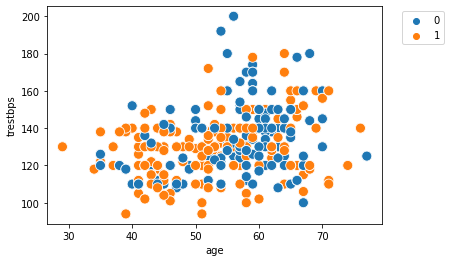

In [ ]:
sns.scatterplot(x = 'age', y = 'trestbps', s = 100, hue ='target', data=df);
plt.legend(bbox_to_anchor=(1.2, 1))


# **Data Preprocessing**

### **Correlation**

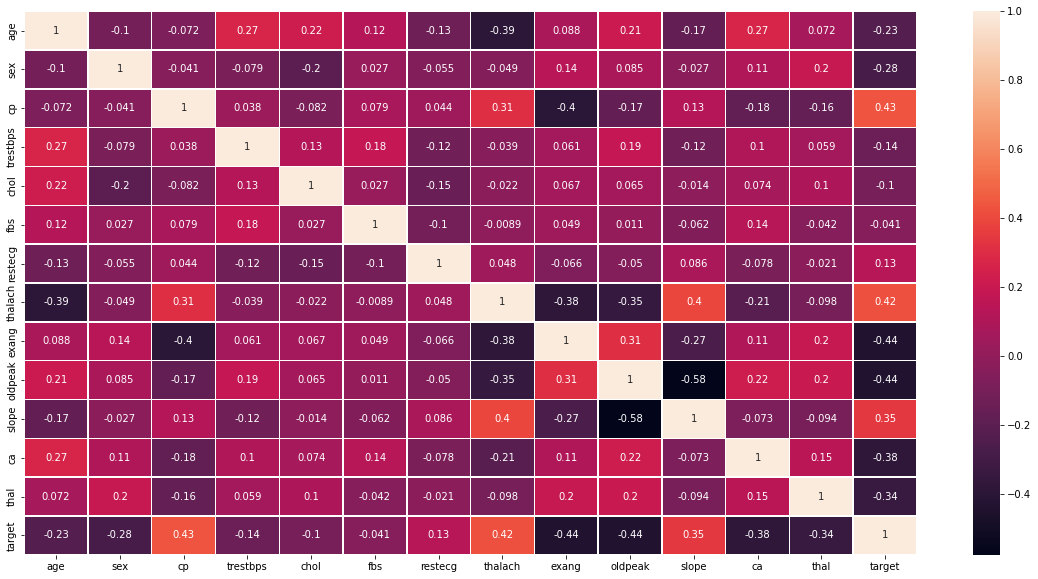

In [ ]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot = True, linewidth = 0.5)

**As you can see all attributes have less correlation with each other. No need to remove any attribute**

### **Histogram**

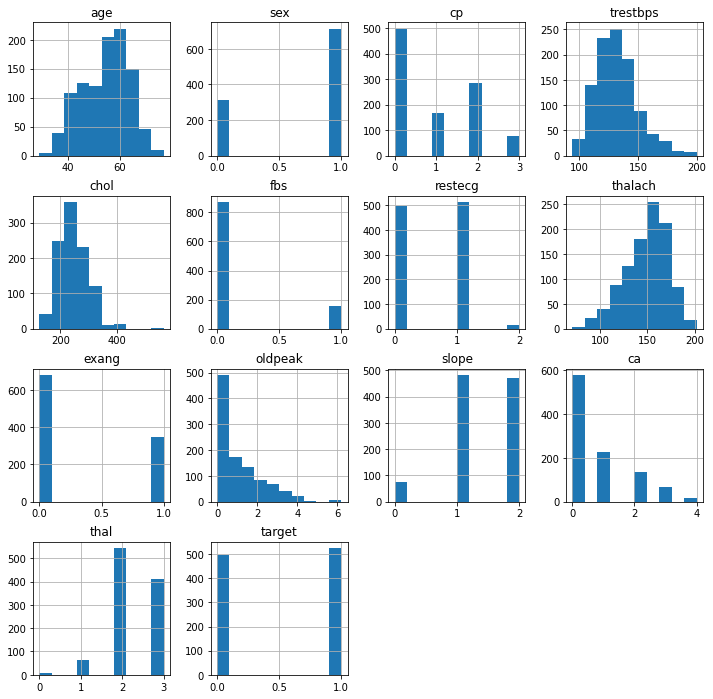

In [ ]:
df.hist(grid = True,figsize=(12,12))
plt.show()

# **Contingency table**

## **Prior and Posterior Probability Using Contingency Table**

In [ ]:
def bayesposterior(prior, likelihood, evidence, string):
      print('Prior=', prior),
      print('Likelihood=', likelihood),
      print('Evidence=', evidence),
      print('Equation =','(Prior*Likelihood)/Evidence')
      print(string, (prior*likelihood)/evidence)

In [ ]:
for i in df.columns:
  if i!="target":
    ct = pd.crosstab(df[i], df['target'], margins = True)
    # print("\nContigency Table of",i)
    # print("\n")
    # print(ct)

    ct.columns = ["0","1","rowtotal"]
    l=list([str(j) for j in list(Counter(df[i]).keys())])+["coltotal"]
    ct.index= l
    # print("-----------------------------------------------")


In [ ]:
ct1 = pd.crosstab(df['restecg'], df['target'], margins = True)
print(ct1)
print("----------------------------------------------------")
ct1.columns = ["0","1","rowtotal"]
ct1.index= ["0","1","2","coltotal"]
print(ct1 / ct1.loc["coltotal","rowtotal"])
print("----------------------------------------------------")
bayesposterior(prior = ct1.iloc[1,1]/ct1.iloc[3,1],
               likelihood = ct1.iloc[3,1]/ct1.iloc[3,2],
               evidence = ct1.iloc[1,2]/ct1.iloc[3,2],
               string = 'Posterior Probability =')

target     0    1   All
restecg                
0        283  214   497
1        204  309   513
2         12    3    15
All      499  526  1025
----------------------------------------------------
                 0         1  rowtotal
0         0.276098  0.208780  0.484878
1         0.199024  0.301463  0.500488
2         0.011707  0.002927  0.014634
coltotal  0.486829  0.513171  1.000000
----------------------------------------------------
Prior= 0.5874524714828897
Likelihood= 0.5131707317073171
Evidence= 0.5004878048780488
Equation = (Prior*Likelihood)/Evidence
Posterior Probability = 0.6023391812865497


In [ ]:
ct2 = pd.crosstab(df['slope'], df['target'], margins = True)
print("Contigency Table of slope\n")
print(ct2)
print("----------------------------------------------------------")
ct2.columns = ["0","1","rowtotal"]
ct2.index= ["0","1","2","coltotal"]
print(ct2 / ct2.loc["coltotal","rowtotal"])
print("----------------------------------------------------------")
bayesposterior(prior = ct2.iloc[1,1]/ct2.iloc[3,1],
               likelihood = ct2.iloc[3,1]/ct2.iloc[3,2],
               evidence = ct2.iloc[1,2]/ct2.iloc[3,2],
               string = 'Posterior Probability =')

Contigency Table of slope

target    0    1   All
slope                 
0        46   28    74
1       324  158   482
2       129  340   469
All     499  526  1025
----------------------------------------------------------
                 0         1  rowtotal
0         0.044878  0.027317  0.072195
1         0.316098  0.154146  0.470244
2         0.125854  0.331707  0.457561
coltotal  0.486829  0.513171  1.000000
----------------------------------------------------------
Prior= 0.30038022813688214
Likelihood= 0.5131707317073171
Evidence= 0.47024390243902436
Equation = (Prior*Likelihood)/Evidence
Posterior Probability = 0.3278008298755187


In [ ]:
ct3 = pd.crosstab(df['cp'], df['target'], margins = True)
print("Contigency Table of ChestPain\n")
print(ct3)
print("----------------------------------------------------------")
ct3.columns = ["0","1","rowtotal"]
ct3.index= ["0","1","2","3","coltotal"]
print(ct3 / ct3.loc["coltotal","rowtotal"])
print("----------------------------------------------------------")
bayesposterior(prior = ct3.iloc[2,1]/ct3.iloc[4,1],
               likelihood = ct3.iloc[4,1]/ct3.iloc[4,2],
               evidence = ct3.iloc[2,2]/ct3.iloc[4,2],
               string = 'Posterior Probability =')

Contigency Table of ChestPain

target    0    1   All
cp                    
0       375  122   497
1        33  134   167
2        65  219   284
3        26   51    77
All     499  526  1025
----------------------------------------------------------
                 0         1  rowtotal
0         0.365854  0.119024  0.484878
1         0.032195  0.130732  0.162927
2         0.063415  0.213659  0.277073
3         0.025366  0.049756  0.075122
coltotal  0.486829  0.513171  1.000000
----------------------------------------------------------
Prior= 0.41634980988593157
Likelihood= 0.5131707317073171
Evidence= 0.27707317073170734
Equation = (Prior*Likelihood)/Evidence
Posterior Probability = 0.7711267605633803


# **Splitting Data**

In [ ]:
y = df["target"]
X = df.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

In [ ]:
Counter(y_train)

Counter({1: 419, 0: 401})

In [ ]:
Counter(y_test)

Counter({1: 107, 0: 98})

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Classifer - Naive Bayes**

In [ ]:
# training the model on training set
nb = GaussianNB()
nb.fit(X_train,y_train)

# making predictions on the testing set
nbpred = nb.predict(X_test)

#Confusion Matrix
nb_conf_matrix = confusion_matrix(y_test, nbpred)

# comparing actual response values (y_test) with predicted response values (y_pred)
nb_acc_score = accuracy_score(y_test, nbpred)


# **Accuracy, Confusion Matrix, Precision, F1_score, Recall**

In [ ]:
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')

Accuracy of Naive Bayes model: 85.36585365853658 



confusion matrix


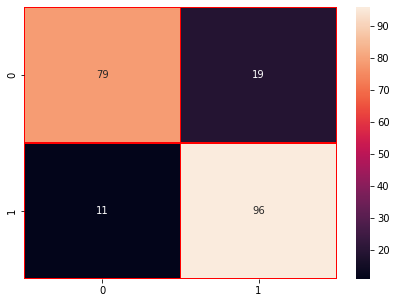

In [ ]:
print("confusion matrix")
f,ax = plt.subplots(figsize=(7, 5))
sns.heatmap(nb_conf_matrix, annot=True, linewidths=0.5,linecolor="red", fmt= '.0f',ax=ax)
plt.show()

In [ ]:
from sklearn.metrics import  precision_score
p_score = precision_score(y_test, nbpred)
print("Precision Score:",p_score)

Precision Score: 0.8347826086956521


In [ ]:
from sklearn.metrics import  recall_score
r_score = recall_score(y_test, nbpred)
print("Recall:",r_score)

Recall: 0.897196261682243


In [ ]:
from sklearn.metrics import  f1_score
f1_score = f1_score(y_test, nbpred)
print("F1 Score:",f1_score)

F1 Score: 0.8648648648648648


# **K-Fold Cross Validation**

In [ ]:
X = np.array(X_train)
y = np.array(y_train)
split = [5,6,7,8,9,10,11,12]
kfoldacc = []
max_acc_index=0
max_acc=0
for s in split:
  kf = KFold(n_splits=s)
  avg=[]
  for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    nb1 = GaussianNB()
    nb1.fit(X_train,y_train)
    nbpred1 = nb.predict(X_test)
    nb_acc_score1 = accuracy_score(y_test, nbpred1)
    avg.append(nb_acc_score1)
  kfoldacc.append((sum(avg)/len(avg))*100)
  average=(sum(avg)/len(avg))*100
  if average>max_acc:
    max_acc=average
    max_acc_index=s
print("K-Fold Max Acc - ", max_acc)
print("K =", max_acc_index) 

K-Fold Max Acc -  82.18591444397894
K = 11
